The following code is for plotting data collected from the SIHMD simulation. Graphs plot percent of the population for each compartment over time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# load csv
file_path = "C:/Users/amyyy/Downloads/sihmd_single_2025-06-18T14-17-38-329Z.csv"

# read csv
sim_df = pd.read_csv(file_path) 

# create new dataframes for each compartment
prop_susceptible_df = sim_df[['Day', 'S']] if 'S' in sim_df else None
prop_infected_df = sim_df[['Day', 'I']] if 'I' in sim_df else None
prop_hospitalized_df = sim_df[['Day', 'H']] if 'H' in sim_df else None
prop_immune_df = sim_df[['Day', 'M']] if 'M' in sim_df else None
prop_dead_df = sim_df[['Day', 'D']] if 'D' in sim_df else None

In [4]:
dfs = {
    'Susceptible': prop_susceptible_df,
    'Infected': prop_infected_df,
    'Hospitalized': prop_hospitalized_df,
    'Immune': prop_immune_df,
    'Dead': prop_dead_df
}

In [5]:
# verify successful read
for name, sub_df in dfs.items():
    print(f"\n--- {name} ---")
    print(sub_df.head())


--- Susceptible ---
   Day         S
0    1  0.962500
1    2  0.962500
2    3  0.962500
3    4  0.959375
4    5  0.971875

--- Infected ---
   Day         I
0    1  0.037500
1    2  0.037500
2    3  0.037500
3    4  0.040625
4    5  0.025000

--- Hospitalized ---
   Day    H
0    1  0.0
1    2  0.0
2    3  0.0
3    4  0.0
4    5  0.0

--- Immune ---
   Day         M
0    1  0.000000
1    2  0.000000
2    3  0.000000
3    4  0.000000
4    5  0.003125

--- Dead ---
   Day    D
0    1  0.0
1    2  0.0
2    3  0.0
3    4  0.0
4    5  0.0


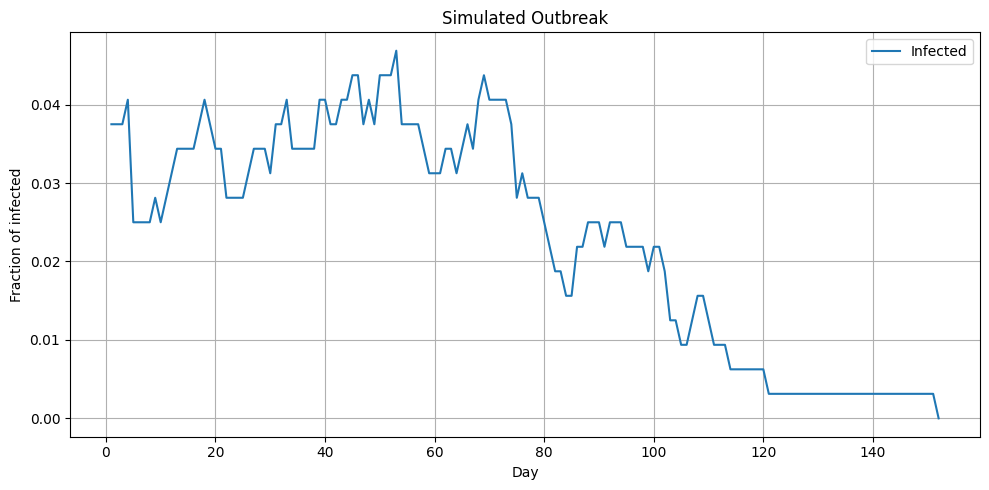

In [6]:
plt.figure(figsize=(10,5))
plt.plot(sim_df['Day'], sim_df['I'], label='Infected')


plt.xlabel('Day')
plt.ylabel('Fraction of infected')
plt.legend(loc = 'best')
plt.title('Simulated Outbreak')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
import io
import pandas as pd

file_path = "C:/Users/amyyy/Downloads/sihmd_batch_separated_2025-06-18T16-22-02-310Z.csv"

# Read the file and preprocess to add a 'Trial' column
with open(file_path, 'r') as f:
    lines = f.readlines()

trial_num = None
processed_lines = []
for line in lines:
    if line.startswith('# Trial'):
        trial_num = int(line.strip().split()[-1])
    elif not line.startswith('#'):
        if processed_lines and not processed_lines[0].startswith('Trial'):
            # Insert 'Trial' as the first column in the header
            header = 'Trial,' + processed_lines[0]
            processed_lines[0] = header
        if trial_num is not None:
            line = f"{trial_num}," + line
        processed_lines.append(line)

# Combine processed lines and read into DataFrame
csv_data = ''.join(processed_lines)
trials_df = pd.read_csv(io.StringIO(csv_data))

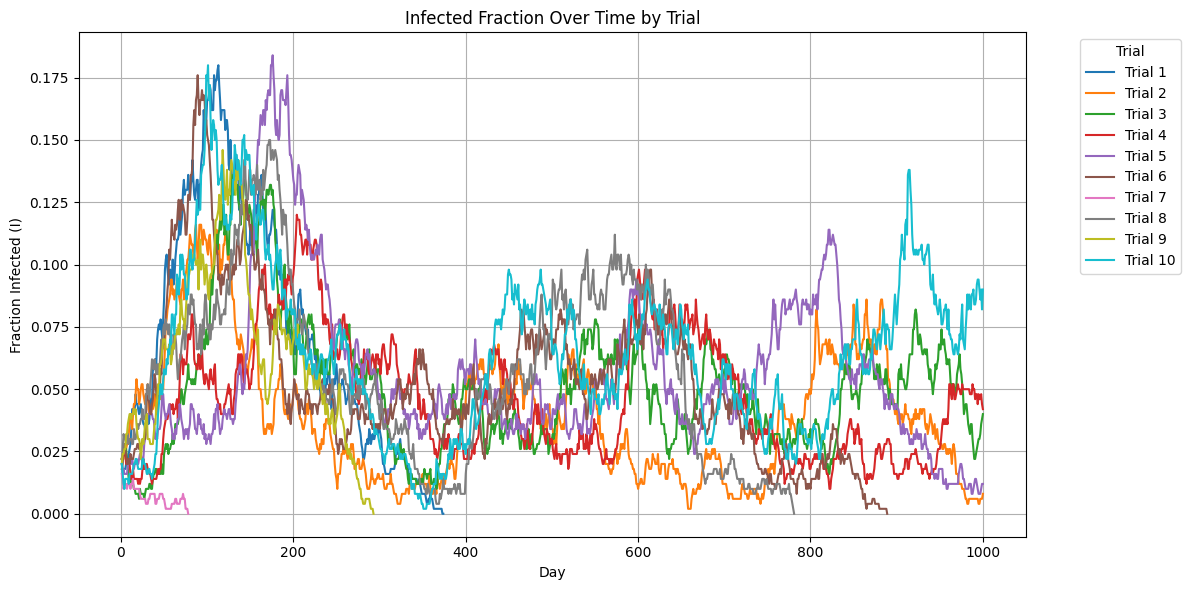

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Filter out rows where 'Day' is not a digit (removes header rows accidentally included)
filtered_df = trials_df[trials_df['Day'].apply(lambda x: str(x).isdigit())].copy()

for trial in filtered_df['Trial'].unique():
    trial_data = filtered_df[filtered_df['Trial'] == trial]
    plt.plot(trial_data['Day'].astype(int), trial_data['I'].astype(float), label=f'Trial {trial}')

plt.xlabel('Day')
plt.ylabel('Fraction Infected (I)')
plt.title('Infected Fraction Over Time by Trial')
plt.legend(title='Trial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()